In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv(r"C:\Users\kibe\Downloads\customer_booking.csv", encoding="ISO-8859-1")
df.sample(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
37971,2,Internet,RoundTrip,177,5,3,Wed,DPSTPE,Indonesia,1,0,0,4.67,0
16221,1,Internet,RoundTrip,185,27,13,Tue,KCHPEK,Malaysia,1,0,0,6.42,0
43916,4,Internet,RoundTrip,26,6,0,Sat,CTSDMK,Thailand,1,1,1,8.67,1
41441,2,Internet,RoundTrip,7,5,13,Wed,PENSYD,Malaysia,1,1,1,8.58,1
18957,1,Internet,RoundTrip,94,54,3,Mon,MELPEN,Malaysia,1,1,1,8.83,1
16970,2,Internet,RoundTrip,27,28,8,Thu,KNOPER,Australia,0,0,1,5.62,0
16083,4,Internet,RoundTrip,58,28,5,Wed,KCHMEL,Malaysia,1,1,1,8.83,0
41466,2,Internet,RoundTrip,19,5,12,Mon,PENSYD,Australia,1,1,1,8.58,1
24754,1,Internet,RoundTrip,95,62,11,Thu,SGNSYD,Australia,1,1,1,8.58,0
49841,2,Internet,RoundTrip,16,6,13,Tue,PENTPE,Taiwan,1,1,0,4.67,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

To provide more context, below is a more detailed data description, explaining exactly what each column means:<br>

num_passengers = number of passengers travelling<br>
sales_channel = sales channel booking was made on<br>
trip_type = trip Type (Round Trip, One Way, Circle Trip)<br>
purchase_lead = number of days between travel date and booking date<br>
length_of_stay = number of days spent at destination<br>
flight_hour = hour of flight departure<br>
flight_day = day of week of flight departure<br>
route = origin -> destination flight route<br>
booking_origin = country from where booking was made<br>
wants_extra_baggage = if the customer wanted extra baggage in the booking<br>
wants_preferred_seat = if the customer wanted a preferred seat in the booking<br>
wants_in_flight_meals = if the customer wanted in-flight meals in the booking<br>
flight_duration = total duration of flight (in hours)<br>
booking_complete = flag indicating if the customer completed the booking<br>

In [4]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [5]:
df.duplicated().sum()

719

In [6]:
# to remove duplicate cells
df = df.drop_duplicates()
df.duplicated().sum()

0

# Feature Engneering

In [7]:
#converting flight day into a numerical value btwn 1 and 7
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)
df["flight_day"].sample(5)

12545    5
1566     7
31116    4
47053    7
28892    2
Name: flight_day, dtype: int64

In [8]:
print(df["sales_channel"].unique())
print(df["trip_type"].unique())


['Internet' 'Mobile']
['RoundTrip' 'CircleTrip' 'OneWay']


In [9]:
df2 = pd.get_dummies(df, columns=['sales_channel']) # dummy variables for the sales channel column
df2.head()

,num_passengers,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile
0,2,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1,0
1,1,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1,0
2,2,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,1,0
3,1,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,1,0
4,2,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,1,0


In [10]:
df2 = pd.get_dummies(df2, columns=['trip_type']) # dummy variables for the trip_type column
df2.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1,0,0,0,1
1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1,0,0,0,1
2,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,1,0,0,0,1
3,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,1,0,0,0,1
4,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,1,0,0,0,1


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49281 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   num_passengers          49281 non-null  int64  
 1   purchase_lead           49281 non-null  int64  
 2   length_of_stay          49281 non-null  int64  
 3   flight_hour             49281 non-null  int64  
 4   flight_day              49281 non-null  int64  
 5   route                   49281 non-null  object 
 6   booking_origin          49281 non-null  object 
 7   wants_extra_baggage     49281 non-null  int64  
 8   wants_preferred_seat    49281 non-null  int64  
 9   wants_in_flight_meals   49281 non-null  int64  
 10  flight_duration         49281 non-null  float64
 11  booking_complete        49281 non-null  int64  
 12  sales_channel_Internet  49281 non-null  uint8  
 13  sales_channel_Mobile    49281 non-null  uint8  
 14  trip_type_CircleTrip    49281 non-null

In [12]:
df2=df2.drop(['num_passengers','route','booking_origin'], axis=1) #dropping unncessary columns
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49281 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   purchase_lead           49281 non-null  int64  
 1   length_of_stay          49281 non-null  int64  
 2   flight_hour             49281 non-null  int64  
 3   flight_day              49281 non-null  int64  
 4   wants_extra_baggage     49281 non-null  int64  
 5   wants_preferred_seat    49281 non-null  int64  
 6   wants_in_flight_meals   49281 non-null  int64  
 7   flight_duration         49281 non-null  float64
 8   booking_complete        49281 non-null  int64  
 9   sales_channel_Internet  49281 non-null  uint8  
 10  sales_channel_Mobile    49281 non-null  uint8  
 11  trip_type_CircleTrip    49281 non-null  uint8  
 12  trip_type_OneWay        49281 non-null  uint8  
 13  trip_type_RoundTrip     49281 non-null  uint8  
dtypes: float64(1), int64(8), uint8(5)
memo

In [13]:
df2.head()

,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
0,262,19,7,6,1,0,0,5.52,0,1,0,0,0,1
1,112,20,3,6,0,0,0,5.52,0,1,0,0,0,1
2,243,22,17,3,1,1,0,5.52,0,1,0,0,0,1
3,96,31,4,6,0,0,1,5.52,0,1,0,0,0,1
4,68,22,15,3,1,0,1,5.52,0,1,0,0,0,1


In [14]:
df2.describe()

,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,sales_channel_Mobile,trip_type_CircleTrip,trip_type_OneWay,trip_type_RoundTrip
count,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000
mean,84.723281,23.053976,9.070676,3.813620,0.668229,0.295631,0.426635,7.279974,0.149977,0.891155,0.108845,0.002354,0.007833,0.989814
std,90.410229,33.832149,5.413099,1.991913,0.470854,0.456331,0.494593,1.496390,0.357052,0.311448,0.311448,0.048460,0.088156,0.100414
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,51.000000,17.000000,9.000000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,115.000000,28.000000,13.000000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,867.000000,778.000000,23.000000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [23]:
X = df2.drop(columns=['booking_complete'])
y = df2['booking_complete']

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rand_clf = RandomForestClassifier(n_estimators=100)
rand_clf.fit(X_train, y_train)
y_pred = rand_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of RandomForest Classifier: {:.2f}%".format(accuracy*100))

svm_clf = svm.SVC(kernel='linear', C=1)
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Support vector machine: {:.2f}%".format(accuracy*100))

gb_clf = GradientBoostingClassifier(n_estimators=100)
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Gradient Boosting: {:.2f}%".format(accuracy*100))


Accuracy of RandomForest Classifier: 84.41%
Accuracy of Support vector machine: 85.00%
Accuracy of Gradient Boosting: 85.00%


GradientBoosting Classifier and SupportVectorMachine have the best performance.

In [24]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_estimators': [10, 50, 100],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10]}
RFclf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(RFclf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters: ", grid_search.best_params_)
print("Best score: {:.2f}%".format(grid_search.best_score_*100))


param_grid = {'n_estimators': [10, 50, 100],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10]}
GBclf = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(GBclf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters: ", grid_search.best_params_)
print("Best score: {:.2f}%".format(grid_search.best_score_*100))





Best parameters:  {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 10}
Best score: 85.00%
Best parameters:  {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 10}
Best score: 85.00%


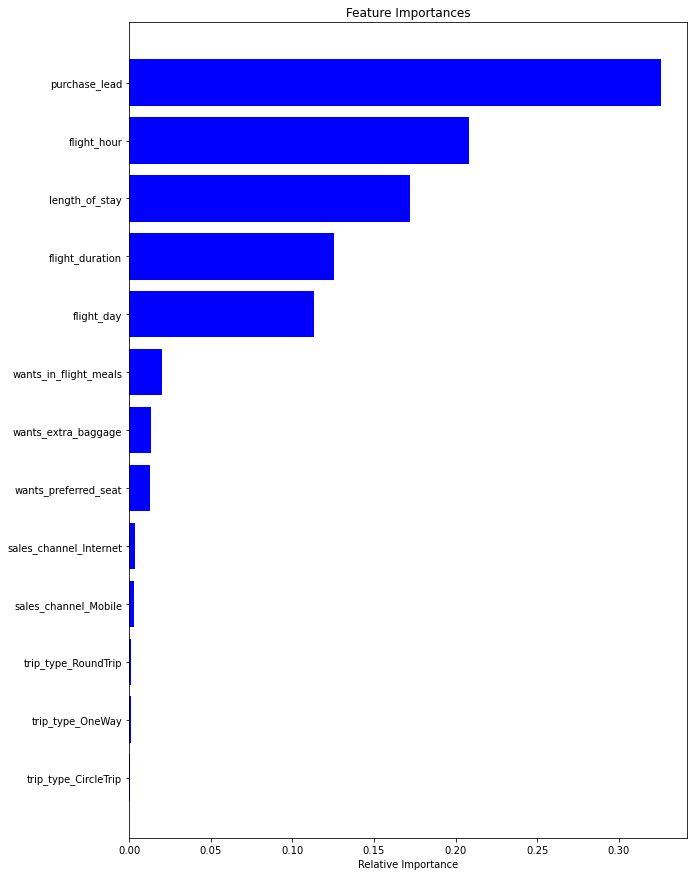

In [34]:
# plottting the features in order of importance
features = [i.split("__")[0] for i in X.columns]
importances = rand_clf.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Most important features are purchase_lead, flight_hour, length_of_stay, flight_duration, flight_day.